In [272]:
import numpy
import pandas as pd
import yfinance as yf
from datetime import date


In [475]:
df = yf.download("MS", start="2021-01-1", end="2021-09-1", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [476]:
df['ClosePrev'] = df['Close'].shift(1)
df

,Open,High,Low,Close,Adj Close,Volume,ClosePrev
Date,,,,,,,
2021-01-04,69.279999,69.930000,67.720001,68.330002,67.199631,14014600,NaN
2021-01-05,68.160004,70.080002,68.080002,69.489998,68.340439,11120400,68.330002
2021-01-06,71.410004,74.879997,70.559998,73.680000,72.461121,18334300,69.489998
2021-01-07,74.800003,76.510002,74.800003,74.940002,73.700287,13530400,73.680000
2021-01-08,74.470001,75.339996,73.849998,75.250000,74.005150,12896700,74.940002
...,...,...,...,...,...,...,...
2021-08-09,99.570000,100.989998,98.970001,100.739998,100.739998,8297700,99.730003
2021-08-10,100.739998,102.930000,100.589996,102.040001,102.040001,8490500,100.739998
2021-08-11,102.279999,103.930000,101.849998,103.879997,103.879997,8793200,102.040001


In [477]:
df['todaysChange'] = 100*((df['Close'] - df['ClosePrev']))/df['ClosePrev']
df['nextDayChange'] = df['todaysChange'].shift(-1)


In [478]:
# df[['Volume', '% Change', 'shiftedChange']].to_csv("tslaChange.csv")

In [479]:
df

,Open,High,Low,Close,Adj Close,Volume,ClosePrev,todaysChange,nextDayChange
Date,,,,,,,,,
2021-01-04,69.279999,69.930000,67.720001,68.330002,67.199631,14014600,NaN,NaN,1.697638
2021-01-05,68.160004,70.080002,68.080002,69.489998,68.340439,11120400,68.330002,1.697638,6.029648
2021-01-06,71.410004,74.879997,70.559998,73.680000,72.461121,18334300,69.489998,6.029648,1.710101
2021-01-07,74.800003,76.510002,74.800003,74.940002,73.700287,13530400,73.680000,1.710101,0.413661
2021-01-08,74.470001,75.339996,73.849998,75.250000,74.005150,12896700,74.940002,0.413661,1.076409
...,...,...,...,...,...,...,...,...,...
2021-08-09,99.570000,100.989998,98.970001,100.739998,100.739998,8297700,99.730003,1.012729,1.290454
2021-08-10,100.739998,102.930000,100.589996,102.040001,102.040001,8490500,100.739998,1.290454,1.803211
2021-08-11,102.279999,103.930000,101.849998,103.879997,103.879997,8793200,102.040001,1.803211,0.760494


In [489]:
df.loc[(df['nextDayChange'] > 0) & (df['todaysChange'] < 0), 'signal'] = 'BUY'
df.loc[(df['nextDayChange'] < 0) & (df['todaysChange'] < 0), 'signal'] = 'SELL'
df.loc[(df['nextDayChange'] > 0) & (df['todaysChange'] > 0), 'signal'] = 'HOLD'
df.loc[(df['nextDayChange'] < 0) & (df['todaysChange'] > 0), 'signal'] = 'SELL'


In [490]:
df.tail(20)

,Open,High,Low,Close,Adj Close,Volume,ClosePrev,todaysChange,nextDayChange,signal
Date,,,,,,,,,,
2021-07-19,89.510002,89.690002,87.580002,89.349998,88.698959,14043000,91.250000,-2.082193,3.324008,BUY
2021-07-20,89.139999,93.599998,89.000000,92.320000,91.647324,11522300,89.349998,3.324008,3.639515,HOLD
2021-07-21,93.239998,96.050003,93.180000,95.680000,94.982841,14116900,92.320000,3.639515,-0.114967,SELL
2021-07-22,95.419998,96.230003,94.839996,95.570000,94.873642,9235300,95.680000,-0.114967,-1.067277,SELL
2021-07-23,96.279999,97.169998,94.190002,94.550003,93.861076,13222800,95.570000,-1.067277,2.104704,BUY
2021-07-26,94.370003,96.660004,94.349998,96.540001,95.836578,11420600,94.550003,2.104704,-0.062148,SELL
2021-07-27,95.879997,97.050003,95.519997,96.480003,95.777016,8972900,96.540001,-0.062148,-0.424962,SELL
2021-07-28,96.510002,96.889999,95.550003,96.070000,95.369995,10054000,96.480003,-0.424962,0.218590,BUY
2021-07-29,96.160004,96.849998,95.529999,96.279999,96.279999,9016200,96.070000,0.218590,-0.311586,SELL


In [491]:
training_df = df[[ 'todaysChange', 'Close', 'signal']]

In [492]:
training_df

,todaysChange,Close,signal
Date,,,
2021-01-04,NaN,68.330002,NaN
2021-01-05,1.697638,69.489998,HOLD
2021-01-06,6.029648,73.680000,HOLD
2021-01-07,1.710101,74.940002,HOLD
2021-01-08,0.413661,75.250000,HOLD
...,...,...,...
2021-08-09,1.012729,100.739998,HOLD
2021-08-10,1.290454,102.040001,HOLD
2021-08-11,1.803211,103.879997,HOLD


In [493]:
training_df = training_df.dropna(thresh=3)

In [494]:
training_df.tail(30)

,todaysChange,Close,signal
Date,,,
2021-07-01,0.359902,92.019997,HOLD
2021-07-02,0.010870,92.029999,SELL
2021-07-06,-1.977616,90.209999,SELL
2021-07-07,-0.199535,90.029999,SELL
2021-07-08,-2.654670,87.639999,BUY
2021-07-09,3.069378,90.330002,HOLD
2021-07-12,2.679064,92.750000,HOLD
2021-07-13,0.495956,93.209999,SELL
2021-07-14,-0.804635,92.459999,BUY


In [495]:
from sklearn import tree
from sklearn import linear_model


clf = linear_model.LogisticRegression()
clf = clf.fit(training_df[[ 'todaysChange']], training_df['signal'])

In [496]:
clf.predict([[5.096987]])

array(['HOLD'], dtype=object)

BUY 90.72000122070312 -90.72000122070312
SELL 90.69999694824219 -0.0200042724609375
BUY 87.91000366210938 -87.93000793457031
BUY 84.08999633789062 -172.02000427246094
SELL 85.69999694824219 -0.6200103759765625
BUY 90.20999908447266 -90.83000946044922
SELL 90.02999877929688 -0.8000106811523438
BUY 87.63999938964844 -88.44001007080078
SELL 93.20999908447266 4.769989013671875
BUY 91.25 -86.48001098632812
BUY 89.3499984741211 -175.83000946044922
SELL 95.56999969482422 15.309989929199219


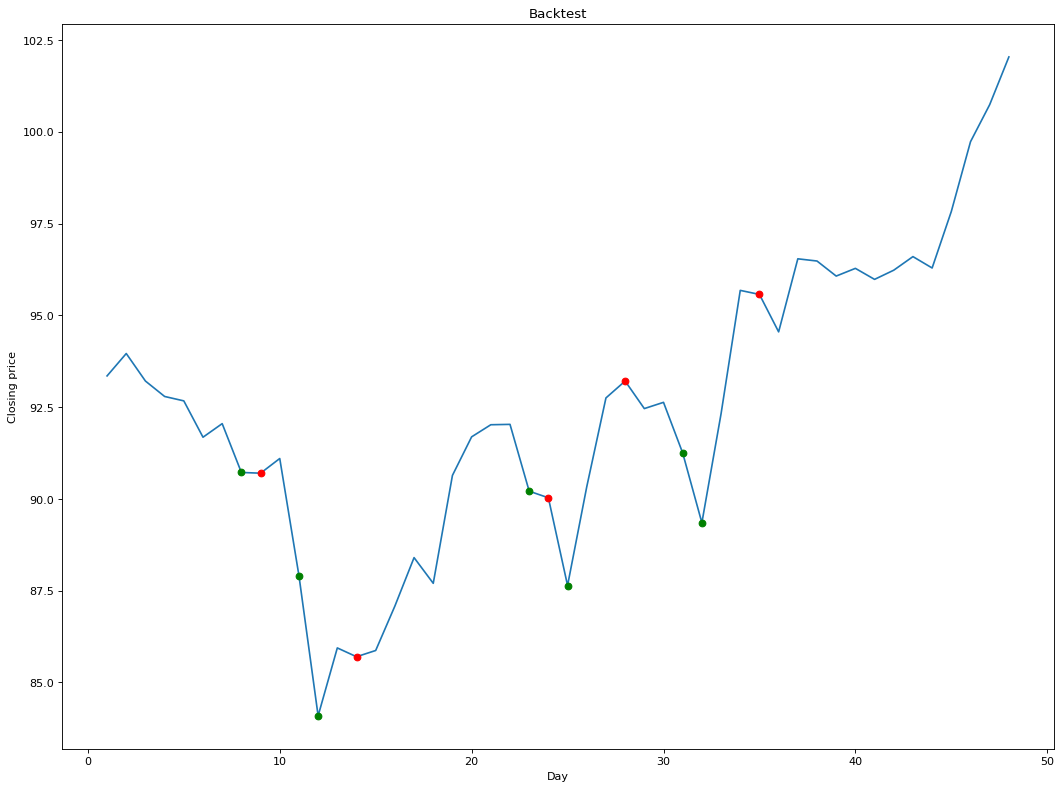

15.309989929199219

In [497]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(16, 12), dpi=80)


signals = []
prices = []
days = []

def plot_backtest(signals, prices, days):
#     print(prices,days)
    plt.plot(days,prices)
    for i in range(len(prices)):
#         print(signals[i])
        if signals[i] == 'BUY':
            plt.plot(days[i], prices[i],'go')
        if signals[i] == 'SELL':
            plt.plot(days[i], prices[i],'ro')
        
    plt.title('Backtest')
    plt.xlabel('Day')
    plt.ylabel('Closing price')    
    
    plt.show()

def backtest():
    num_stocks = 0
    prof = 0
    cnt = 1
    for i in range(50,2,-1):
        modified_df = training_df.drop(training_df.tail(i).index,inplace=False) # drop last n rows
        actual = training_df.tail(i)
        actual = actual.head(1)
#         print(modified_df)
#         return
#         print(actual)
        clf = linear_model.LogisticRegression()
        clf = clf.fit(modified_df[['todaysChange']], modified_df['signal'])
        prediction = clf.predict(actual[['todaysChange']])
#         return
        if prediction[0] == 'BUY':
            prof -= actual['Close'].iloc[0]
            num_stocks += 1
            print('BUY', actual['Close'].iloc[0], prof)
            signals.append('BUY')
            prices.append(actual['Close'].iloc[0])
        elif prediction[0] == 'SELL' and num_stocks > 0:
            prof += (actual['Close'].iloc[0])*num_stocks
            num_stocks = 0
            print('SELL', actual['Close'].iloc[0], prof)
            signals.append('SELL')
            prices.append(actual['Close'].iloc[0])
        else:
            signals.append('NA')
            prices.append(actual['Close'].iloc[0])
        days.append(cnt)
        cnt += 1
    if num_stocks > 0:
#         print(actual['Close'].iloc[0])
        prof += (actual['Close'].iloc[0])*num_stocks

#     print(signals)
#     print(prices)
    plot_backtest(signals, prices, days)

#         if actual['signal'].iloc[0] == prediction[0]:
#             cnt += 1
            
    return prof


backtest()